<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">




# <center> **03. Pandas Introduction!** </center>



## **Outline**
1. **Pandas Introduction**
2. **Pandas DataFrames and DataSeries**
3. **More about maniputalte pandas**




In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "H2" #@param {type:"string"}
assignment_id = 'ai1-'+group_id +'.20212.python'
code_subject = '1'
student_id = "2210" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name', 'course_name', 'student_id'])
config = Config(server_name='https://azuregrader.azurewebsites.net/api', 
                course_name='ai1', student_id='2162107')


def check_solution(assignment_id, student_func_str):

    # Set the endpoint and payload.
    payload = {'func_str': student_func_str, 'assignment_id': assignment_id}
    endpoint_url = config.server_name + '/CheckSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.get(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "course-AI/ai-uis-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

In [ ]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__

'1.1.5'

#**1. Pandas Introduction**

[*Pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API that provides high-performance, easy-to-use data structures and data analysis. 

Among main pandas features, are: 
* Access and manipulate data within a `DataFrame` and `Series`  data structures 
* Allows import CSV data into a *pandas* `DataFrame`
* Allows reindex a `DataFrame` to shuffle data

***see more tutorials at https://pandas.pydata.org/pandas-docs/stable/tutorials.html***


The main data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.
  

<center>
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/pandas-data-structure.png" width="600">
</center>

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to `Series` objects, for instance: 


  
  
  


In [ ]:
#@title **code**
city_names = pd.Series(['Bucaramanga', 'Bogotá', 'Málaga'])
population_col = pd.Series([3201, 10157850,000])

miprimerdata = pd.DataFrame({ 'Ciudades': city_names, 'Population': population_col })

# **2. DataFrame and series**

The data frame is used for data manipulation like in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html). Typically the DataFrame load data from external entire files. The files can have millions of data that can be manipulated with pandas using Dataframes. For instance: 

In [ ]:
#@title **code** Loading and inspecting 
a =  pd.read_csv("data/california_housing_train.csv")
#("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
d = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
type(d), type(a)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

DataFrame.head  displays the first few records of a DataFrame:

In [ ]:
#@title **code** Dsiplay data, see columns and shape
print("columns and shape", d.columns, d.shape)
print("---------------- \n Display data \n---------------")
d.head(17)

columns and shape Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object') (17000, 9)
---------------- 
 Display data 
---------------


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [ ]:
#@title **code** `DataFrame.describe` to show interesting statistics about a DataFrame
d.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


A powerful feature of *pandas* is graphing. For example, `DataFrame.hist`  shows the distribution of values in a column

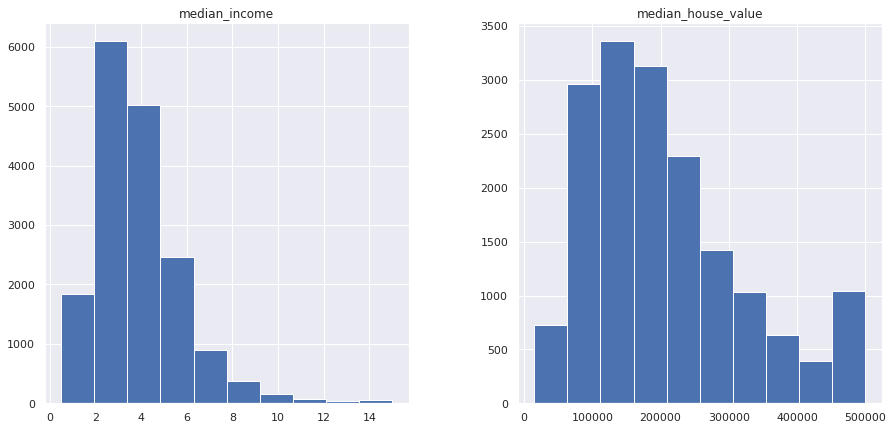

In [ ]:
#@title **code**
plt.figure(figsize = (15, 7))
ax= plt.subplot(1,2,1)
d.hist('median_income', ax=ax);
ax=plt.subplot(1,2,2)
d.hist('median_house_value', ax=ax);

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Explain next plots. 
- Which information can be obtained from these plots?
- How related is the bar-plot with histograms?
- Plot an histogram of `population` and `scatterplot` of other variable. 

In [ ]:
 #@title **code student**





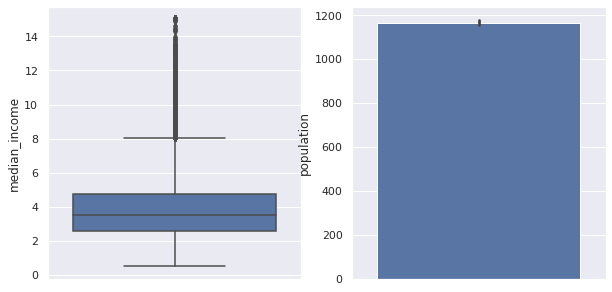

In [ ]:
#@title **code** Which information we can obtain?
plt.figure(figsize = (10, 5))
ax=plt.subplot(1,2,1)
sns.boxplot(data=d, y='median_income', ax= ax);
ax=plt.subplot(1,2,2)
sns.barplot( y='population', data=d, estimator=np.median, ax= ax);


We can also operate for specific `series` into the `DataFrame`. See next examples

In [ ]:
#@title **code** working with series 
print(d["median_house_value"].head())

#@markdown acces to a particular data
print(d["median_house_value"][500])

print(type(d), type(d["median_house_value"]))

#@markdown acces to a specific range of data
d[1100:1115]

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64
154600.0
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1100,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0
1101,-117.11,32.69,34.0,1144.0,295.0,1271.0,302.0,2.0900,91800.0
1102,-117.11,32.68,36.0,26.0,14.0,58.0,23.0,1.9107,125000.0
1103,-117.11,32.67,52.0,280.0,71.0,217.0,71.0,1.4844,83300.0
1104,-117.11,32.67,52.0,204.0,74.0,248.0,57.0,1.7961,47500.0
1105,-117.11,32.67,46.0,928.0,236.0,790.0,235.0,1.6806,92500.0
1106,-117.11,32.67,43.0,515.0,146.0,445.0,140.0,1.6094,93000.0
1107,-117.11,32.64,23.0,1619.0,447.0,1025.0,415.0,1.8580,67500.0
1108,-117.11,32.62,27.0,1846.0,509.0,1078.0,482.0,2.1719,131500.0
1109,-117.11,32.59,18.0,2329.0,580.0,1538.0,567.0,2.1179,153100.0


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What about next lines?
- How can be helpful?

In [ ]:
#@title **code** 
#to obtain only values to a easy processing
print(d["population"].unique()   )
print(d["housing_median_age"].unique()   )
print(d["median_house_value"].dtype, d["population"].dtype, d["latitude"].dtype)

[1015. 1129.  333. ... 1899.  516. 3546.]
[15. 19. 17. 14. 20. 29. 25. 41. 34. 46. 16. 21. 48. 31. 28. 24. 18. 30.
 32. 23. 38. 35. 33. 13. 11. 10.  6. 12. 27. 22.  5.  8. 37.  3. 44.  2.
 26.  9.  7. 36.  4. 52. 40. 43. 42. 39. 49. 47. 50. 45. 51.  1.]
float64 float64 float64


**More and more information about the dataset can be easily obtained with `Pandas`** 

In [ ]:
#@title **code** `info()`
# get the description of data
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## **fixing and segmenting data**

In [ ]:
#@title **code** we can obtain a sub-data frame by selecting columns. 
print(d.columns)
#@markdown working with specific columns
d[["population", "median_house_value"]].head()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


,population,median_house_value
0,1015.0,66900.0
1,1129.0,80100.0
2,333.0,85700.0
3,515.0,73400.0
4,624.0,65500.0


In [ ]:
#@title **code:** to add a new column in the dataset
print(population_col) # remember..a manual series
d["new_virtual"] = population_col
d.head(15)

0        3201
1    10157850
2           0
dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new_virtual
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,3201.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,10157850.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,NaN
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,NaN
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0,NaN
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,NaN
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,NaN
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,NaN
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,NaN


In [ ]:
#@title **code** detecting null values
#very important to clean values. 
for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 0
population 0
households 0
median_income 0
median_house_value 0
new_virtual 16997


In [ ]:
#@title **code:** Fill NA/NaN values using the specified method
d.new_virtual.fillna(population_col.mean(), inplace=True)
d.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new_virtual
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,3201.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,10157850.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3387017.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,3387017.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0,3387017.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,3387017.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,3387017.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,3387017.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,3387017.0


## Filtering data by boolean index

In [ ]:
#@title **code** boolean index to filter
d[d.population>15000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new_virtual
2274,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,3387017.0
2871,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,3387017.0
2969,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,3387017.0
3296,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,339700.0,3387017.0
12772,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,3387017.0


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Now, create a dataset with only rows that have `median_house_value` larger tan `30000`,  `housing_median_age` less than 50, and `population` larger than 10000

- Return the new dataframe

--- 

- Display shape of new Dataframe
- Count the registers for each serien in new dataframe
- Display dataframe

** Other option is the interval between [30000 - 40000] 



In [ ]:
 #@title **code student**
def filter_housing_dataframe():

  """ 
  Put your code here 
  """ 

  pass


In [ ]:
#@title ## **Check your answer**
student_func_str = inspect.getsource(filter_housing_dataframe)
r = check_solution(assignment_id, student_func_str) 

In [ ]:
#@title ## **send your answer**
student_func_str = inspect.getsource(filter_housing_dataframe)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


- Using the function [`apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) create a new column named `population_filter` that stores `True` or `False` whether the value of the column `population` is greater than 1429 (mean value).
- Return the dataframe with the added column.


In [ ]:
 #@title **code student**
def apply_dataframe():

  """ 
  Put your code here 
  """ 

  pass

In [ ]:
#@title ## **Check your answer**
student_func_str = inspect.getsource(apply_dataframe)
r = check_solution(assignment_id, student_func_str) 

In [ ]:
#@title ## **send your answer**
student_func_str = inspect.getsource(apply_dataframe)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

## **Indexes**
 Series and DataFrame objects also define an index property that assigns an identifier value to each Series item or DataFrame row. Once created they do not change when data is reordered.

In [ ]:
#@title **code** index examples

print(d.index)
print(type(d.index))

print(population_col.index)
print(type(population_col))

RangeIndex(start=0, stop=17000, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>
RangeIndex(start=0, stop=3, step=1)
<class 'pandas.core.series.Series'>


We can **re-order** the rows using both: manual changes and random vectors to fully change. See next example: 

In [ ]:
np.random.permutation(3)

array([1, 2, 0])

In [ ]:
#@title **code** **Reindex**

d.shape
#@markdown  manually
print((d.reindex([2, 0, 1])))


#@markdown  Reindexing is a great way to shuffle (randomize) a DataFrame
print(np.random.permutation(d.index).shape)
print(d.head(10))
import numpy as np
d_red = d.reindex(np.random.permutation(d.index)).head()
d_red.head(10)

   longitude  latitude  ...  median_house_value  new_virtual
2    -114.56     33.69  ...             85700.0          0.0
0    -114.31     34.19  ...             66900.0       3201.0
1    -114.47     34.40  ...             80100.0   10157850.0

[3 rows x 10 columns]
(17000,)
   longitude  latitude  ...  median_house_value  new_virtual
0    -114.31     34.19  ...             66900.0       3201.0
1    -114.47     34.40  ...             80100.0   10157850.0
2    -114.56     33.69  ...             85700.0          0.0
3    -114.57     33.64  ...             73400.0          NaN
4    -114.57     33.57  ...             65500.0          NaN
5    -114.58     33.63  ...             74000.0          NaN
6    -114.58     33.61  ...             82400.0          NaN
7    -114.59     34.83  ...             48500.0          NaN
8    -114.59     33.61  ...             58400.0          NaN
9    -114.60     34.83  ...             48100.0          NaN

[10 rows x 10 columns]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new_virtual
11746,-121.31,37.97,45.0,2604.0,454.0,988.0,442.0,3.6667,123100.0,NaN
5161,-118.13,34.02,41.0,734.0,190.0,565.0,191.0,2.2813,192000.0,NaN
13801,-122.01,37.32,32.0,3108.0,613.0,1577.0,603.0,4.6613,284000.0,NaN
15030,-122.25,38.03,15.0,3338.0,532.0,1834.0,520.0,5.6293,197600.0,NaN
14316,-122.10,37.88,35.0,3701.0,528.0,1511.0,517.0,7.2315,367100.0,NaN


In [ ]:
#@title **code** sort values
d.sort_values(by="housing_median_age").head()
#change by descending

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new_virtual
8232,-118.44,34.04,16.0,18.0,6.0,3.0,4.0,0.536,350000.0,NaN
2990,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.375,137500.0,NaN
2907,-117.76,35.22,4.0,18.0,3.0,8.0,6.0,1.625,275000.0,NaN
14105,-122.06,37.39,26.0,18.0,4.0,8.0,4.0,3.750,375000.0,NaN
288,-116.76,34.14,4.0,42.0,10.0,9.0,3.0,0.536,42500.0,NaN


In [ ]:
#@title **code** remove columns
del d['new_virtual']
d.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
#@title **code** we can also apply operation through series
d.rolling(5).mean().head(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-114.496,33.898,17.0,3387.4,804.2,723.2,308.0,2.01624,74320.0
5,-114.550,33.786,19.8,2542.4,594.8,654.4,261.4,2.38628,75740.0
6,-114.572,33.628,21.0,1593.8,350.6,796.8,295.4,2.55764,76200.0


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Explore other rolling operation
- change window size
- Explain results. 

In [ ]:
#@title **code student**



#3. **More about maniputalte pandas**

In [ ]:
#@title **code**
#markdown **Create dataframes from numpy**
a = np.random.randint(10,size=(20,5))
print(a)
k = pd.DataFrame(a, columns=["uno", "dos", "tres", "cuatro", "cinco"], index=range(10,10+len(a)))
k.head(7)

## **Grouping**

More and more funtionalities to a more flexible manipulation of data. 

In [ ]:
#@title **code**
d.groupby("housing_median_age").max()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new_virtual
housing_median_age,,,,,,,,,
1.0,-120.93,38.23,2254.0,343.0,872.0,268.0,5.2636,191300.0,3387017.0
2.0,-115.80,40.58,21897.0,3513.0,8652.0,2873.0,10.1531,500001.0,3387017.0
3.0,-115.60,38.77,21060.0,3559.0,9623.0,3112.0,11.5199,500001.0,3387017.0
4.0,-116.76,39.00,37937.0,5471.0,16122.0,5189.0,13.4883,500001.0,3387017.0
5.0,-115.55,40.60,25187.0,4386.0,11956.0,3886.0,12.6320,500001.0,3387017.0
6.0,-115.52,38.73,16431.0,2640.0,8222.0,2553.0,13.0502,500001.0,3387017.0
7.0,-116.31,40.60,28258.0,4407.0,15037.0,4072.0,13.8093,500001.0,3387017.0
8.0,-115.59,40.61,32054.0,5290.0,15507.0,5050.0,14.9009,500001.0,3387017.0
9.0,-116.22,40.62,30405.0,4095.0,12873.0,3931.0,10.8289,500001.0,3387017.0


In [ ]:
#@title **code**
d.groupby("housing_median_age").count()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new_virtual
housing_median_age,,,,,,,,,
1.0,2,2,2,2,2,2,2,2,2
2.0,49,49,49,49,49,49,49,49,49
3.0,46,46,46,46,46,46,46,46,46
4.0,161,161,161,161,161,161,161,161,161
5.0,199,199,199,199,199,199,199,199,199
6.0,129,129,129,129,129,129,129,129,129
7.0,151,151,151,151,151,151,151,151,151
8.0,178,178,178,178,178,178,178,178,178
9.0,172,172,172,172,172,172,172,172,172


## Referencias

[1] official panda doc sites:http://pandas.pydata.org/pandas-docs/stable/index.html

[2] Description of a dataset: https://www.kaggle.com/camnugent/california-housing-prices

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
